# Exploratory Data Analysis (EDA)

### Importing libraries and reading data

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [37]:
X = pd.read_csv('input10000.txt', sep=';')
y = pd.read_csv('target10000.txt', sep=';')

In [38]:
df = pd.concat([X,y], axis=1)
df.to_csv('df.csv', index=False)

### Class Distribution

On classification problems you need to know how balanced the class values are.

Highly imbalanced problems (a lot more observations for one class than another) are common and may need special handling in the data preparation stage.

We can quickly get an idea of the distribution of the class attribute in Pandas.

#### Checking Attack Data

In [8]:
y1 = y['dist_BM_RA'].apply(lambda y: 0 if y > 10 else 1)

In [9]:
y1.value_counts()

0    8711
1    1289
Name: dist_BM_RA, dtype: int64

In [10]:
1- y1.value_counts()[1]/y1.value_counts()[0]

0.8520261738032373

#### Train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.15, random_state=42,)

In [12]:
df_train = pd.concat([X_train,y_train], axis=1)
df_train.to_csv('df_train_attack.csv', index=False)

In [13]:
df_test = pd.concat([X_test,y_test], axis=1)
df_test.to_csv('df_test_attack.csv', index=False)

### Checking Defense Data

In [14]:
y2 = y['dist_RM_BA'].apply(lambda y: 0 if y > 10 else 1)

In [15]:
y2.value_counts()

0    8690
1    1310
Name: dist_RM_BA, dtype: int64

In [16]:
1- y2.value_counts()[1]/y2.value_counts()[0]

0.8492520138089759

#### Train-test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.15, random_state=42)

In [18]:
df_train = pd.concat([X_train,y_train], axis=1)
df_train.to_csv('df_train_defense.csv', index=False)

In [19]:
df_test = pd.concat([X_test,y_test], axis=1)
df_test.to_csv('df_test_defense.csv', index=False)

### Exploring the dataset

In [20]:
df = pd.read_csv('df.csv')

In [21]:
df['BM_RA'] = df['dist_BM_RA'].apply(lambda y: 0 if y > 10 else 1)
df['RM_BA'] = df['dist_RM_BA'].apply(lambda y: 0 if y > 10 else 1)
df

,posicao_relativa,distancia,altitude_blue,altitude_red,velocidade_blue,velocidade_red,blue_rwr,red_rwr,missil_blue_a,missil_blue_b,...,shotphi_est_blue_m,shotphi_est_blue_l,threshold_before_blue,threshold_after_blue,threshold_before_red,threshold_after_red,dist_BM_RA,dist_RM_BA,BM_RA,RM_BA
0,0.003254,31.603390,33999.173561,34102.969749,0.822114,0.918976,1.0,0.0,1.0,0.0,...,1.0,0.0,0.849584,0.343499,0.723962,0.121272,1.571172,66395.281062,1,0
1,0.011359,35.081066,34403.762940,30306.803714,0.974130,0.976850,0.0,0.0,0.0,1.0,...,0.0,1.0,0.857628,0.196357,0.105947,0.992903,8699.483529,68902.740032,0,0
2,0.013580,44.271327,21701.537746,29066.122677,0.804774,0.854407,1.0,0.0,0.0,1.0,...,1.0,0.0,0.326241,0.375115,0.158358,0.634020,24178.286657,4582.167407,0,0
3,0.020992,28.881266,26424.682133,25990.050368,0.829339,0.894299,0.0,0.0,1.0,0.0,...,0.0,1.0,0.772713,0.407687,0.512314,0.170849,61450.978857,4.375241,0,1
4,0.028511,29.689731,27696.582111,31193.510487,0.918259,0.928487,0.0,1.0,0.0,0.0,...,0.0,0.0,0.911643,0.785672,0.889041,0.481416,5205.433378,6.441591,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,59.971173,34.555465,33397.268983,34788.845862,0.902012,0.846905,0.0,1.0,0.0,1.0,...,1.0,0.0,0.751224,0.872917,0.350723,0.136460,54503.980569,54503.980569,0,0
9996,59.978034,44.676851,24898.749207,29206.263946,0.829889,0.954608,0.0,0.0,1.0,0.0,...,1.0,0.0,0.612843,0.904888,0.705616,0.796379,66797.908541,66797.908541,0,0
9997,59.982928,37.277382,28884.347997,27852.569821,0.843910,0.988514,1.0,0.0,1.0,0.0,...,0.0,0.0,0.454063,0.839198,0.525648,0.431188,52196.164209,52196.164209,0,0
9998,59.992158,38.296907,22380.491310,26528.959508,0.892154,0.930265,1.0,1.0,0.0,1.0,...,1.0,0.0,0.276843,0.312532,0.650744,0.879417,57785.215181,57785.215181,0,0


### Correlation Analysis

It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help you better prepare your data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.

Variables within a dataset can be related for lots of reasons.

For example:

- One variable could cause or depend on the values of another variable.
- One variable could be lightly associated with another variable.
- Two variables could depend on a third unknown variable.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

- Positive Correlation: both variables change in the same direction.
- Neutral Correlation: No relationship in the change of the variables.
- Negative Correlation: variables change in opposite directions.

The performance of some algorithms can deteriorate if two or more variables are tightly related, called **multicollinearity**. An example is linear regression, where one of the offending correlated variables should be removed in order to improve the skill of the model.

We may also be interested in the correlation between input variables with the output variable in order provide insight into which variables may or may not be relevant as input for developing a model.

The structure of the relationship may be known, e.g. it may be linear, or we may have no idea whether a relationship exists between two variables or what structure it may take. Depending what is known about the relationship and the distribution of the variables, different correlation scores can be calculated.

**Pearson’s Correlation**

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples. The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

$$
\begin{align}
r_{X,Y} = \frac{cov(X,Y)}{\sigma_{X} \sigma_{Y}}
\end{align}
$$

Where:
- $cov(X,Y)$ is the covariance of $X$ and $Y$
- $\sigma_{X}$ and $\sigma_{Y}$ are the standard deviations of $X$ and $Y$

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

In [23]:
corr = round(df.corr()[['BM_RA','RM_BA']],3)
corr

,BM_RA,RM_BA
posicao_relativa,-0.028,-0.034
distancia,-0.103,-0.093
altitude_blue,0.051,-0.029
altitude_red,-0.032,0.058
velocidade_blue,0.031,-0.002
velocidade_red,0.012,0.030
blue_rwr,-0.019,-0.377
red_rwr,-0.376,0.005
missil_blue_a,-0.096,0.034
missil_blue_b,-0.070,0.021


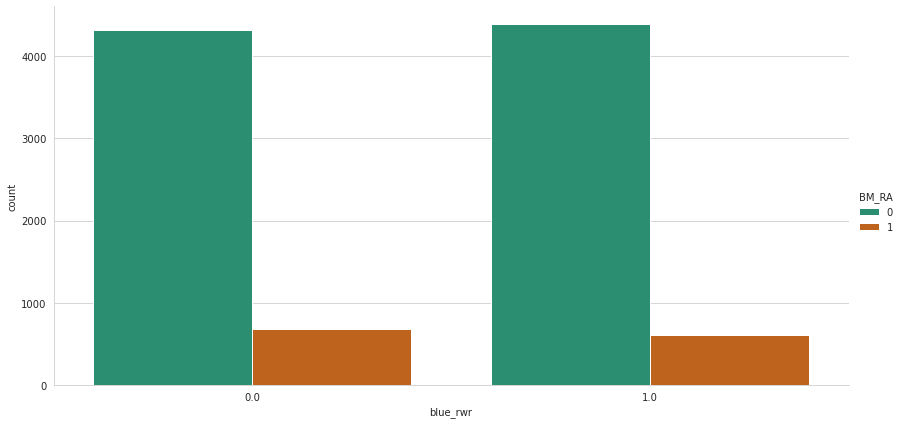

In [24]:
sns.set_style('whitegrid')

ax = sns.catplot(x='blue_rwr', hue="BM_RA", data=df, kind="count", height=6, aspect=2, palette= 'Dark2')

**Pairplot and Joinplots to compare features with each other** 

Use seaborn on the dataframe to create a pairplot with the hue indicated by the kill column.

<Figure size 864x576 with 0 Axes>

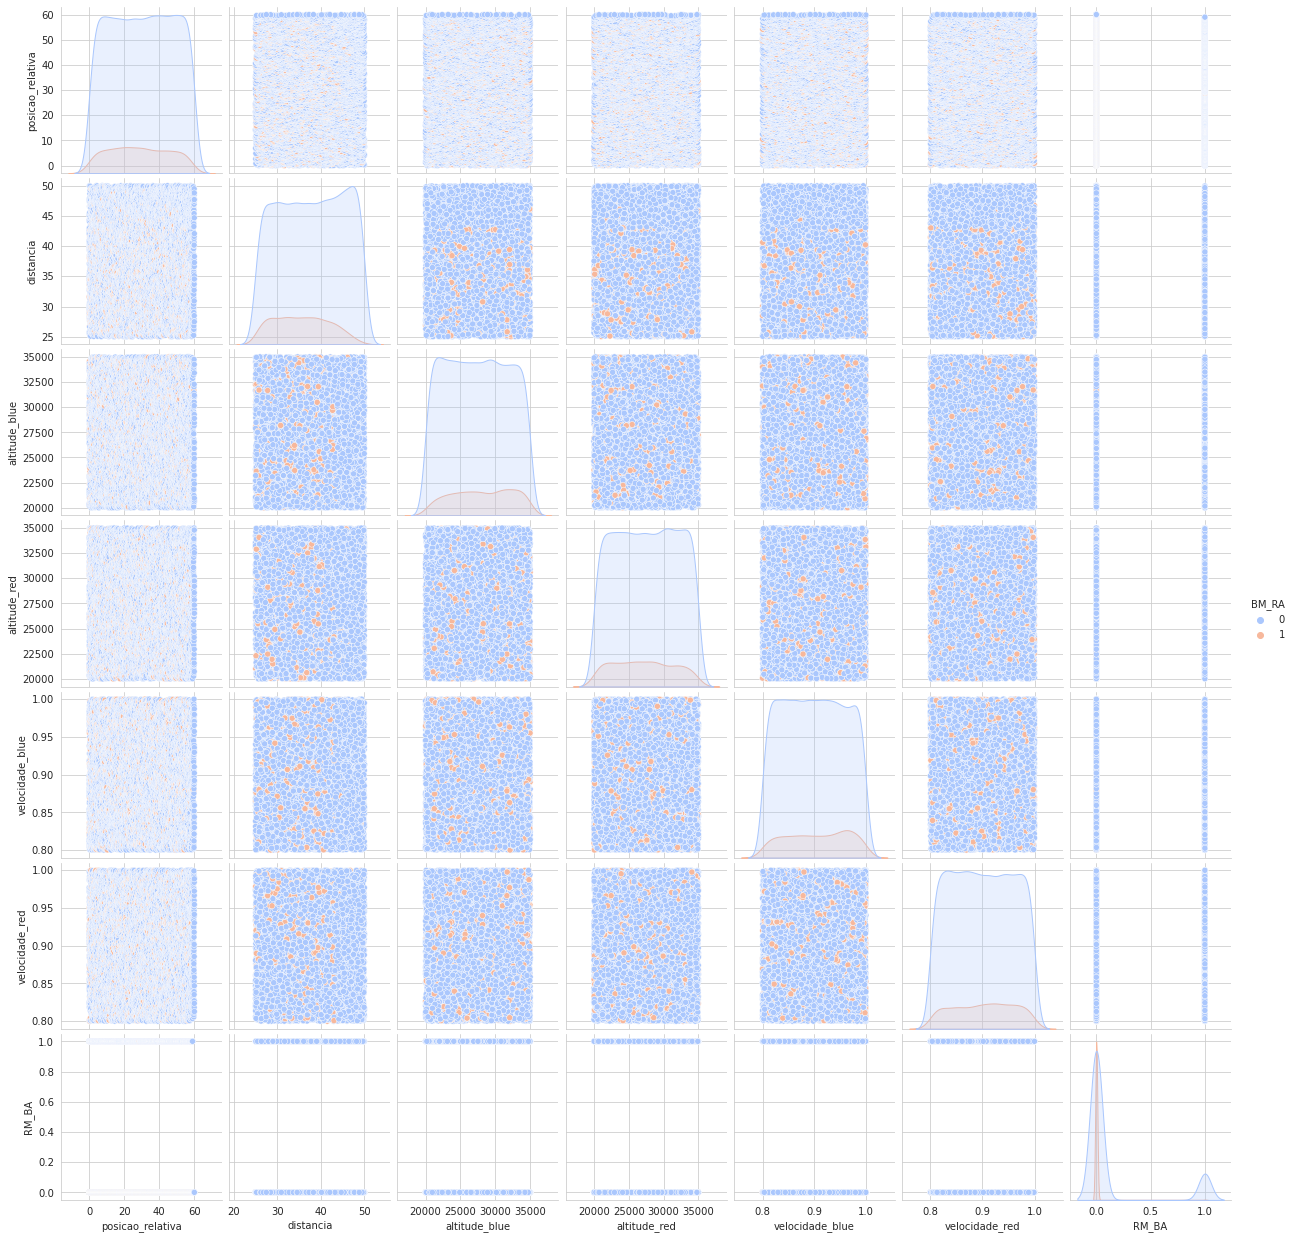

In [26]:
plt.figure(figsize=(12,8))
sns.pairplot(df[['posicao_relativa','distancia', 'altitude_blue', 'altitude_red', 'velocidade_blue', 'velocidade_red','RM_BA', "BM_RA"]], hue="BM_RA", palette='coolwarm');

**Now using jointplot, compare the feature 'distance' with the others.** 

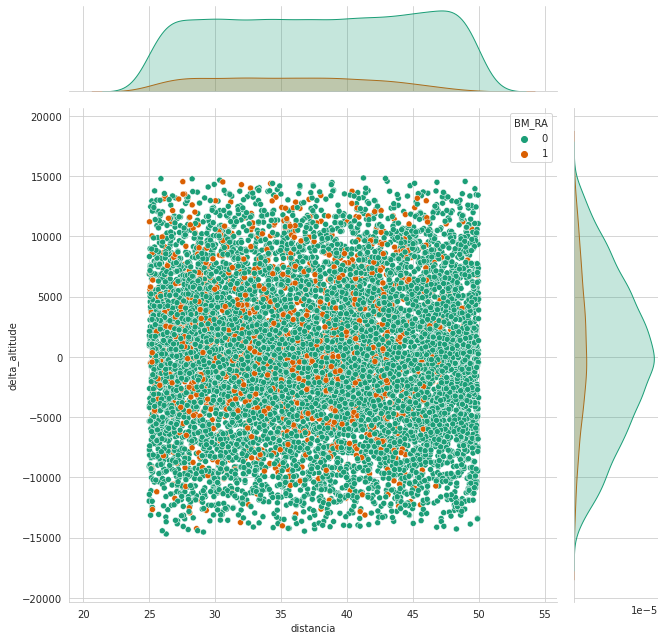

In [27]:
df['delta_altitude'] = df['altitude_blue'] - df['altitude_red']
df['delta_velocidade'] = df['velocidade_blue'] - df['velocidade_red']                                               
sns.jointplot(data=df, x='distancia',y='delta_altitude', hue='BM_RA', height=9, palette = 'Dark2');

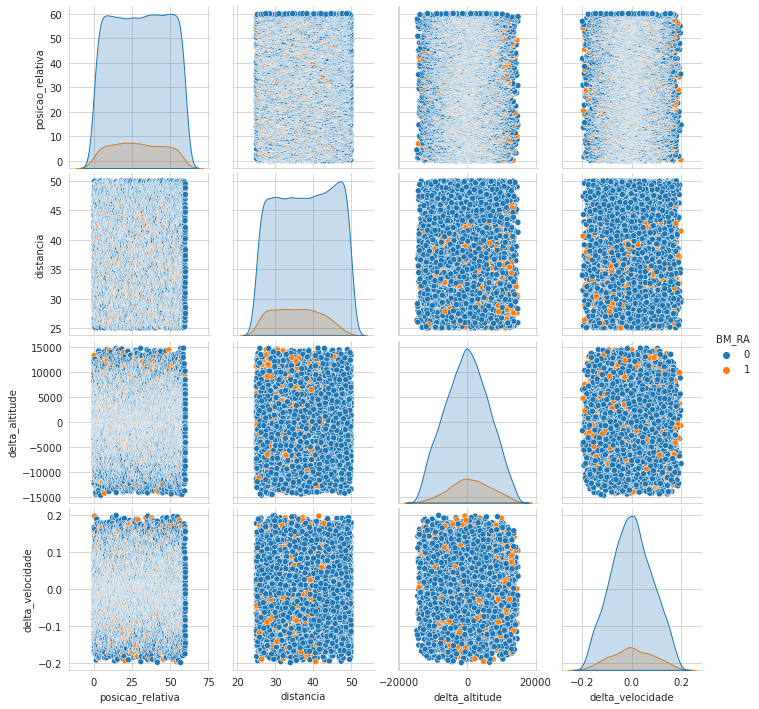

In [30]:
sns.pairplot(df[['posicao_relativa','distancia', 'delta_altitude', 'delta_velocidade', "BM_RA"]], hue="BM_RA");

In [28]:
def resultado(x):
    if x['BM_RA'] == 1 and x['RM_BA']==1:
        return 'Sucesso no ataque e defesa'
    elif x['BM_RA'] == 1 and x['RM_BA']==0:
        return 'Sucesso no ataque'
    elif x['BM_RA'] == 0 and x['RM_BA']==1:
        return 'Sucesso na defesa'
    else:
        return 'Fracasso no ataque e defesa'        

In [29]:
df['resultado'] = df.apply(resultado,axis=1)
df

,posicao_relativa,distancia,altitude_blue,altitude_red,velocidade_blue,velocidade_red,blue_rwr,red_rwr,missil_blue_a,missil_blue_b,...,threshold_after_blue,threshold_before_red,threshold_after_red,dist_BM_RA,dist_RM_BA,BM_RA,RM_BA,delta_altitude,delta_velocidade,resultado
0,0.003254,31.603390,33999.173561,34102.969749,0.822114,0.918976,1.0,0.0,1.0,0.0,...,0.343499,0.723962,0.121272,1.571172,66395.281062,1,0,-103.796188,-0.096862,Sucesso no ataque
1,0.011359,35.081066,34403.762940,30306.803714,0.974130,0.976850,0.0,0.0,0.0,1.0,...,0.196357,0.105947,0.992903,8699.483529,68902.740032,0,0,4096.959226,-0.002720,Fracasso no ataque e defesa
2,0.013580,44.271327,21701.537746,29066.122677,0.804774,0.854407,1.0,0.0,0.0,1.0,...,0.375115,0.158358,0.634020,24178.286657,4582.167407,0,0,-7364.584931,-0.049633,Fracasso no ataque e defesa
3,0.020992,28.881266,26424.682133,25990.050368,0.829339,0.894299,0.0,0.0,1.0,0.0,...,0.407687,0.512314,0.170849,61450.978857,4.375241,0,1,434.631766,-0.064960,Sucesso na defesa
4,0.028511,29.689731,27696.582111,31193.510487,0.918259,0.928487,0.0,1.0,0.0,0.0,...,0.785672,0.889041,0.481416,5205.433378,6.441591,0,1,-3496.928376,-0.010228,Sucesso na defesa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,59.971173,34.555465,33397.268983,34788.845862,0.902012,0.846905,0.0,1.0,0.0,1.0,...,0.872917,0.350723,0.136460,54503.980569,54503.980569,0,0,-1391.576880,0.055107,Fracasso no ataque e defesa
9996,59.978034,44.676851,24898.749207,29206.263946,0.829889,0.954608,0.0,0.0,1.0,0.0,...,0.904888,0.705616,0.796379,66797.908541,66797.908541,0,0,-4307.514739,-0.124719,Fracasso no ataque e defesa
9997,59.982928,37.277382,28884.347997,27852.569821,0.843910,0.988514,1.0,0.0,1.0,0.0,...,0.839198,0.525648,0.431188,52196.164209,52196.164209,0,0,1031.778176,-0.144604,Fracasso no ataque e defesa
9998,59.992158,38.296907,22380.491310,26528.959508,0.892154,0.930265,1.0,1.0,0.0,1.0,...,0.312532,0.650744,0.879417,57785.215181,57785.215181,0,0,-4148.468198,-0.038111,Fracasso no ataque e defesa


### Descriptive Statistics Analysis

Descriptive statistics can give you great insight into the shape of each attribute.

Often you can create more summaries than you have time to review. The *describe()* function on the Pandas DataFrame lists 8 statistical properties of each attribute:

- Count
- Mean
- Standard Devaition
- Minimum Value
- 25th Percentile
- 50th Percentile (Median)
- 75th Percentile
- Maximum Value

In [31]:
df.describe()

,posicao_relativa,distancia,altitude_blue,altitude_red,velocidade_blue,velocidade_red,blue_rwr,red_rwr,missil_blue_a,missil_blue_b,...,threshold_before_blue,threshold_after_blue,threshold_before_red,threshold_after_red,dist_BM_RA,dist_RM_BA,BM_RA,RM_BA,delta_altitude,delta_velocidade
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,30.000024,37.499994,27499.995534,27499.997912,0.900000,0.900000,0.500000,0.500000,0.330000,0.330000,...,0.500000,0.500000,0.500000,0.500000,24847.879170,24720.362358,0.128900,0.131000,-0.002378,-1.842462e-08
std,17.321388,7.217228,4330.348744,4330.341518,0.057738,0.057738,0.500025,0.500025,0.470236,0.470236,...,0.288690,0.288690,0.288690,0.288690,21578.491015,21576.168977,0.335106,0.337417,6182.104916,8.171135e-02
min,0.003254,25.001953,20000.729106,20000.866508,0.800008,0.800011,0.000000,0.000000,0.000000,0.000000,...,0.000040,0.000034,0.000100,0.000048,0.308047,0.601526,0.000000,0.000000,-14701.843940,-1.974347e-01
25%,15.002190,31.250985,23750.465006,23749.790506,0.850008,0.850011,0.000000,0.000000,0.000000,0.000000,...,0.250069,0.250045,0.250032,0.250058,5175.015343,4955.480726,0.000000,0.000000,-4462.505388,-5.836991e-02
50%,30.000489,37.499024,27499.864155,27499.687256,0.900004,0.899996,0.500000,0.500000,0.000000,0.000000,...,0.499988,0.500005,0.499968,0.499982,21916.276230,21858.097882,0.000000,0.000000,-7.648516,-1.004149e-03
75%,44.996032,43.748683,31249.841176,31250.072172,0.949992,0.949997,1.000000,1.000000,1.000000,1.000000,...,0.749986,0.749996,0.749972,0.749965,41104.442245,40633.656288,0.000000,0.000000,4470.829492,5.902635e-02
max,59.997544,49.997662,34998.610025,34999.896655,0.999983,0.999982,1.000000,1.000000,1.000000,1.000000,...,0.999940,0.999990,0.999989,0.999902,100859.662030,90242.767789,1.000000,1.000000,14852.722709,1.994967e-01


### Plotting

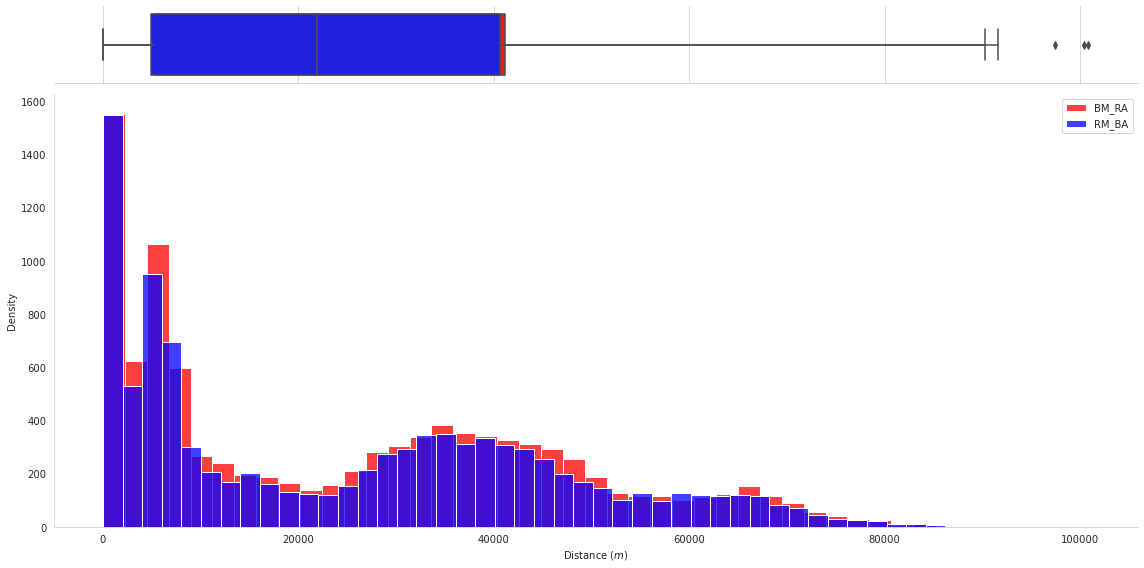

In [51]:
x1 = df['dist_BM_RA'].values
x2 = df['dist_RM_BA'].values

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(16,8))

sns.boxplot(x=x1, ax=ax_box, color='red')
sns.histplot(x=x1, ax=ax_hist, bins=45, color='red')
sns.boxplot(x=x2, ax=ax_box, color='blue' )
sns.histplot(x=x2, ax=ax_hist, bins=45, color='blue')

plt.xlabel('Distance ($m$)')
plt.legend(['BM_RA','RM_BA'])
plt.ylabel('Density')
plt.tight_layout()
plt.grid()

ax_box.set(yticks=[], xlabel = None)
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)